## Outline

1. General points
    * 1.1. Purposes
    * 1.2. Importing modules
2. Regression Routines
3. Polynomial Features
    * 3.1. Ordinary quadratic regression
    * 3.2. Quadratic regression with feature engineering
    * 3.3. Selecting Features
4. An Alternate View
    * 4.1. Scaling Features with normalization
5. Complex Functions

## 1. General points

***

### 1.1. Purposes
#### Explore feature engineering and polynomial regression which allows us to use the machinery of linear regression to fit very complicated, even very non-linear functions.

### 1.2. Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

## 2. Regression Routines

***
\
Before getting involved in exploring feature engineering and polynomial regression development. We need to start with setting up a cost function and gradient descent for it to find the minimum parameters **w** and **b** respectively.   

In [2]:
## Function to compute gradient descent matrix
def compute_gradient_matrix(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (array_like Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (scalar )                Values of parameter of the model      
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
                                  
    """
    m,n = X.shape
    f_wb = X @ w + b              
    e   = f_wb - y                
    dj_dw  = (1/m) * (X.T @ e)    
    dj_db  = (1/m) * np.sum(e)    
        
    return dj_db,dj_dw

## Function to calculate the cost
def compute_cost_matrix(X, y, w, b, verbose=False):
    """
    Computes the gradient for linear regression 
     Args:
      X : (array_like Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,)) actual value 
      w : (array_like Shape (n,)) parameters of the model 
      b : (scalar               ) parameter of the model 
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns
      cost: (scalar)                      
    """ 
    m,n = X.shape

    # calculate f_wb for all examples.
    f_wb = X @ w + b  
    # calculate cost
    total_cost = (1/(2*m)) * np.sum((f_wb-y)**2)

    if verbose: print("f_wb:")
    if verbose: print(f_wb)
        
    return total_cost

# Loop version of multi-variable compute_cost
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X : (ndarray): Shape (m,n) matrix of examples with multiple features
      w : (ndarray): Shape (n)   parameters for prediction   
      b : (scalar):              parameter  for prediction   
    Returns
      cost: (scalar)             cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i],w) + b       
        cost = cost + (f_wb_i - y[i])**2              
    cost = cost/(2*m)                                 
    return(np.squeeze(cost)) 

## Function to compute the gradient
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X : (ndarray Shape (m,n)) matrix of examples 
      y : (ndarray Shape (m,))  target value of each example
      w : (ndarray Shape (n,))  parameters of the model      
      b : (scalar)              parameter of the model      
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i,j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw/m                                
    dj_db = dj_db/m                                
        
    return dj_db,dj_dw

# This version saves more values and is more verbose than the assigment versons
def gradient_descent_houses(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X : (array_like Shape (m,n)    matrix of examples 
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")
       
    return w, b, hist #return w,b and history for graphing


## Test a gradient descent in action
def run_gradient_descent(X,y,iterations=1000, alpha = 1e-6):

    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent_houses(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")
    
    return(w_out, b_out, hist_out)

# compact extaction of hist data
#x = hist["iter"]
#J  = np.array([ p    for p in hist["cost"]])
#ws = np.array([ p[0] for p in hist["params"]])
#dj_ws = np.array([ p[0] for p in hist["grads"]])

#bs = np.array([ p[1] for p in hist["params"]]) 


## Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
  
    Args:
      X : (array_like Shape (m,n)    matrix of examples 
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist #return w,b and history for graphing


## Run the final version of gradient descent
def run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    
    return(w_out, b_out)

## 3. Polynomial Features

***


* Notations for Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:

$$  f_w,_b = w_0x_0 + w_1x_1 + ... + w_{n-1}x_{n-1} + b $$
$$ (1) $$

What if your features/data are non-linear or are combinations of features? For example, Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters  **𝐰**, **𝐛**  in (1) equation to 'fit' the equation to the training data. However, no amount of adjusting of  **𝐰**, **𝐛** in (1) will achieve a fit to a non-linear curve.

### 3.1. Ordinary quadratic regression

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. 

We'll start with a simple quadratic:  
$$ 𝑦 = 1 + 𝑥^2 $$

We're familiar with all the routines we're using. We'll use **np.c_[..]** which is a NumPy routine to concatenate along the column boundary.

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.69806954], b: -52.0834


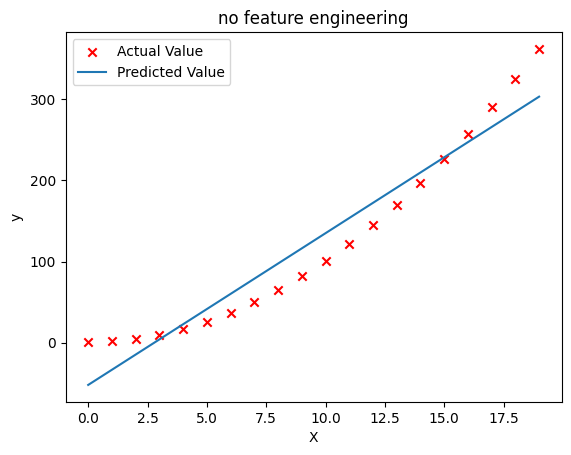

In [3]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

# Test the model with a scale of X^2 (without parameter w)
model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

# Plot the results of the model with a scale of X to the graph
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

#### Summary: 

* Note the value of ""𝐰" **[18.7]** and "b" is **-52.0834**. This implies the model after fitting/training is:
$$ 18.7𝑥 - 52.0834 $$
 
Well, as expected, it is not a great fit. What is needed is something like, or a polynomial feature.  
$$ 𝑦 = 𝑤_0 * 𝑥_0^2 + 𝑏 $$
To accomplish this, we need modify the input data to engineer the needed features. 

* If we swap the original data with a version that squares the **𝑥** value, then you can achieve
$$ 𝑦 = 𝑤_0 * 𝑥_0^2 + 𝑏 $$

### 3.2. Quadratic regression with feature engineering

***

Swap X for X**2 below:

Iteration         0, Cost: 7.26507e+03
Iteration      1000, Cost: 4.37129e-06
Iteration      2000, Cost: 4.33145e-06
Iteration      3000, Cost: 4.29196e-06
Iteration      4000, Cost: 4.25284e-06
Iteration      5000, Cost: 4.21408e-06
Iteration      6000, Cost: 4.17566e-06
Iteration      7000, Cost: 4.13760e-06
Iteration      8000, Cost: 4.09989e-06
Iteration      9000, Cost: 4.06252e-06
w,b found by gradient descent: w: [0.99998159], b: 0.0042


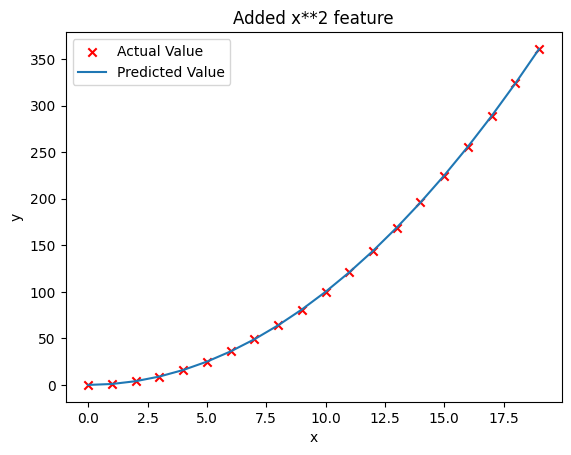

In [4]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# Engineer features 
X = x**2      #<-- added engineered feature

# Test the model with a scale of X^2 (with parameter w)
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

# Plot the results of the model with a scale of X^2 to the graph
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

#### Summary: 

* Note the value of "𝐰" **[1]** and "b" is **0.0490**. This implies the model after fitting/training is:
$$ 1𝑥 + 0.0490 $$
 
Great! near perfect fit. Notice the values of  **𝐰** and **b** printed right above the graph: "w,b found by gradient descent: w: [1.], b: 0.0490." 

Gradient descent modified our initial values of  **w**,**𝑏** to be (1.0, 0.049) or a model of  
$$ 𝑦 = 1 ∗ 𝑥_0^2 + 0.049 $$
, that is very close to our target of  
$$ 𝑦 = 1 ∗ 𝑥_0^2 + 1 $$
If we ran it longer, it could be a better match!!!

### 3.3. Selecting Features

***

Above, we knew that an 𝑥^2 term was required. It may not always be obvious which features are required. 
One could add a variety of potential features to try and find the most useful. 
\
For example, what if we had instead tried :  

$$ 𝑦 = 𝑤_0 * 𝑥_0 + 𝑤_1 * 𝑥_1^2 + 𝑤_2 * 𝑥_2^3 + 𝑏 $$

* Swap X for X**3 below:

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08237526 0.53552137 0.02752216], b: 0.0106


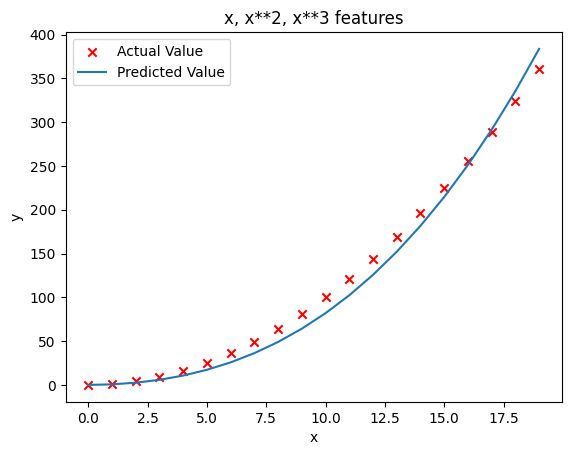

In [5]:
# create a new target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

# Test the model with a scale of X^3
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

# Plot the results of the model with a scale of X^3 to the graph
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

#### Summary:

* Note the value of "𝐰", **[0.08 0.54 0.03]** and "b" is **0.0106**. This implies the model after fitting/training is:
$$  0.08x + 0.54x^2 + 0.03^3 + 0.0106  $$

Gradient descent has emphasized the data that is the best fit to the **𝑥^2** data by increasing the **𝑤1** term relative to the others. 
If you were to run for a very long time, it would continue to reduce the impact of the other terms.

* Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

Let's review this idea:
* Intially, the features were re-scaled so they are comparable to each other
* less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data
* above, after fitting, the weight associated with the **𝑥^2** feature is much larger than the weights for **𝑥** or **𝑥^3** as it is the most useful in fitting the data

## 4. An Alternate View

***

Above, polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, the best features will be linear relative to the target. This is best understood with an example.

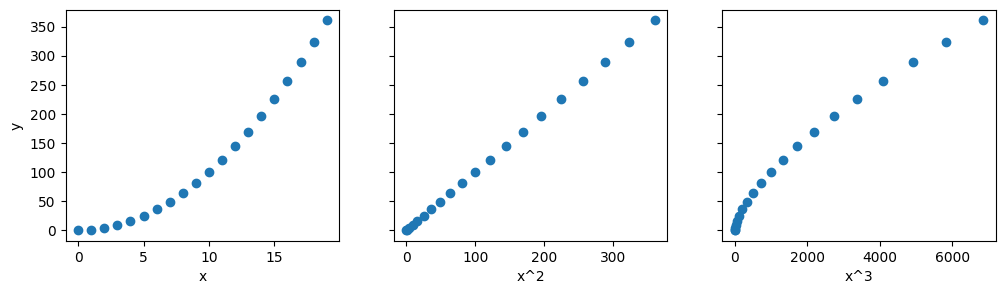

In [6]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

# Plot the results of the model with a scale of X^3 to the graph
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

#### Summary :

* Above, it is clear that the **𝑥^2** feature mapped against the target value **𝑦** is linear. Linear regression can then easily generate a model using that feature.

### 1.5.1. Scaling Features (with normalization)

***

We know, if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. 
In the example above, there is **𝑥**, **𝑥^2** and **𝑥^3** which will naturally have very different scales. 
\
\
Let's apply Z-score normalization to our example.

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.29501788 3.18076489 3.28307153]
Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.26616827e-05 1.13494579e+02 8.43238778e-05], b: 123.5000


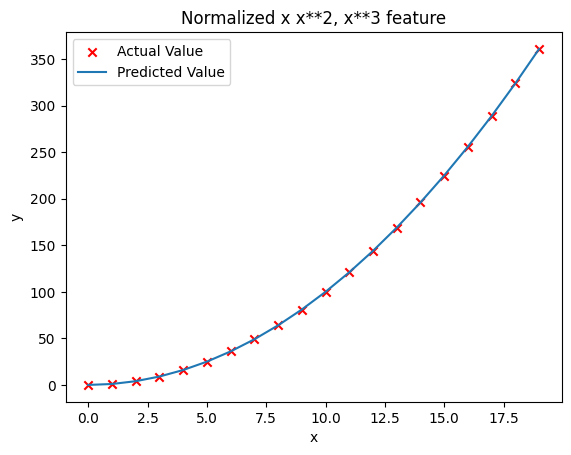

In [7]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# Define a function for using mean normalization using Z-Score method
def zscore_normalize_features(X,rtn_ms=False):
    """
    returns z-score normalized X by column
    Args:
      X : (numpy array (m,n)) 
    Returns
      X_norm: (numpy array (m,n)) input normalized by column
    """
    mu     = np.mean(X,axis=0)  
    sigma  = np.std(X,axis=0)
    X_norm = (X - mu)/sigma      

    if rtn_ms:
        return(X_norm, mu, sigma)
    else:
        return(X_norm)

# test a mean_normalization with Z-Score
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

# Now we can try again with a more aggressive value of alpha

# create target data
x = np.arange(0,20,1)
y = x**2

# engineer features (using Z-Score normalization)
X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

# Test the model with a scale of X^3 (and Z-Score normalization)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

# Plot the results of the model with a scale of X^3 to the graph
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

#### Summary :

Feature scaling allows this to converge much faster (predicted values become more closely to actual values), despite the large values of the parameters of **w**. 
* Note again the values of **𝐰**. The **𝑤_1** term, which is the **𝑥^2** term is the most emphasized. 
Gradient descent has all but eliminated the **𝑥^3** term.

## 5. Complex Functions

***

With feature engineering, even quite complex functions can be modeled:

Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
w,b found by gradient descent: w: [-1.61035138e+00 -1.00624795e+01  3.00029328e+01 -6.91665020e-01
 -2.36908018e+01 -1.51363834e+01  2.08722991e+01 -2.29331209e-03
 -4.68700607e-03  5.51048134e-02  1.06934475e-01 -2.52628726e-02
  6.48762638e-02], b: -0.0073


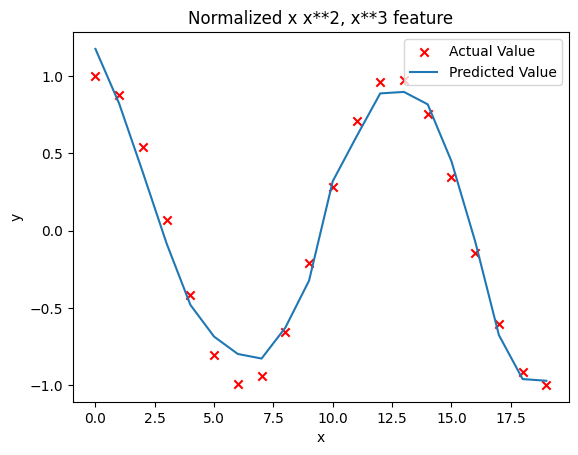

In [8]:
# create target data
x = np.arange(0,20,1)
y = np.cos(x/2)

# engineer features (using Z-Score normalization for )
X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

# Test the model with a scale up to X^13 (and Z-Score normalization)
model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

# Plot the results of the model with a scale of X^3 to the graph
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

## Summary :
* Note the value of "𝐰" **[-1.34    -10.    24.78   5.96   -12.49  -16.26  -9.51   0.59   8.7   11.94  9.27   0.79  -12.82]** and "b" is **-0.0073**. 

This implies the model after fitting/training is:
$$ -1.34x - 10x^2 +24.78x^3 + 5.96x^4 - 12.49x^5 - 16.26x^6 - 9.51x^7 + 0.59x^8 + 8.7x^9 + 11.94x^10 + 9.27x^11 + 0.79x^12 - 12.82x^13 - 0.0073 $$

The following feature engineering with a scaling of 13th power gives us more accurate results, residuals are minimal. 
However, we have to be very careful with these results because they can lead to an overfitting case (a situation when prediction values have variance or "Overfit" with feature values).

We can fit "Overfitting" by:
* Collecting more training examples (data)
* Using fewer features ("X") or to avoid polynomial regression with multiple features